# Big Data Analitics Security


### Laboratory 1a "Data visualisation in Python"

#### Please insert bellow your firstname, lastnema and ID number and run this cell

Mateusz Wiśniewski 148327


# Exercise 1 - DATA

Download from https://www.eea.europa.eu (Analysis and data -> Datahub) and download the chosen data on Europe.

Using the library matplotlib, prepare various graphs presenting the data from the selected files. Each graph should have a title, described axes and a legend.

Prepare five different types of charts.

For details on the matplotlib library, go to matplotlib.org (Quick start guide).


Check if it is possible to save the prepared charts to pdf files.


In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
FILENAME = "eea_s_sufi002_p_2015-2022_v01_r00.csv"

# Read csv file
df = pd.read_csv(FILENAME)

# eu_sdg,dimension,dimension_label,unit,unit_label,geo,geo_label,time,obs_value,obs_status

In [3]:
def export_plot_to_pdf(plot, filename):
    folder = "plots"
    plot.savefig(f"{folder}/{filename}.pdf", format='pdf', bbox_inches='tight')

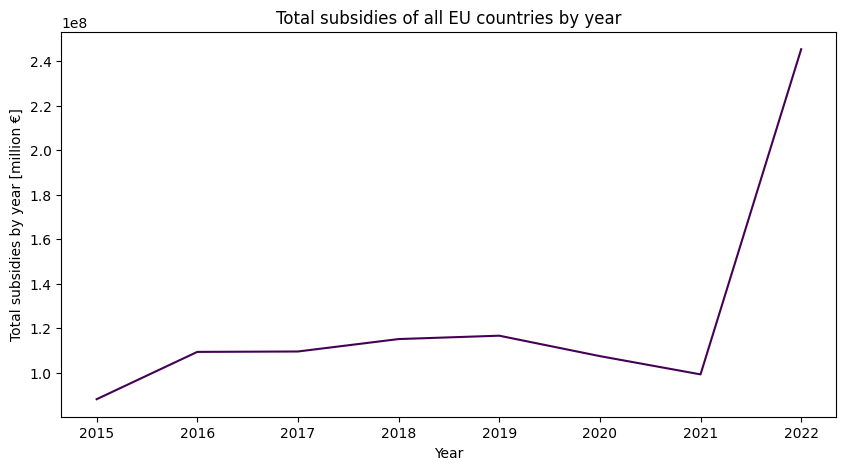

In [4]:
# Chart sum of obs_value by time
df.groupby("time")["obs_value"].sum().plot(kind="line", figsize=(10, 5), colormap="viridis")
plt.title("Total subsidies of all EU countries by year")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.ylabel("Total subsidies by year [million €]")
export_plot_to_pdf(plt, "total_subsidies_by_year")
plt.show()



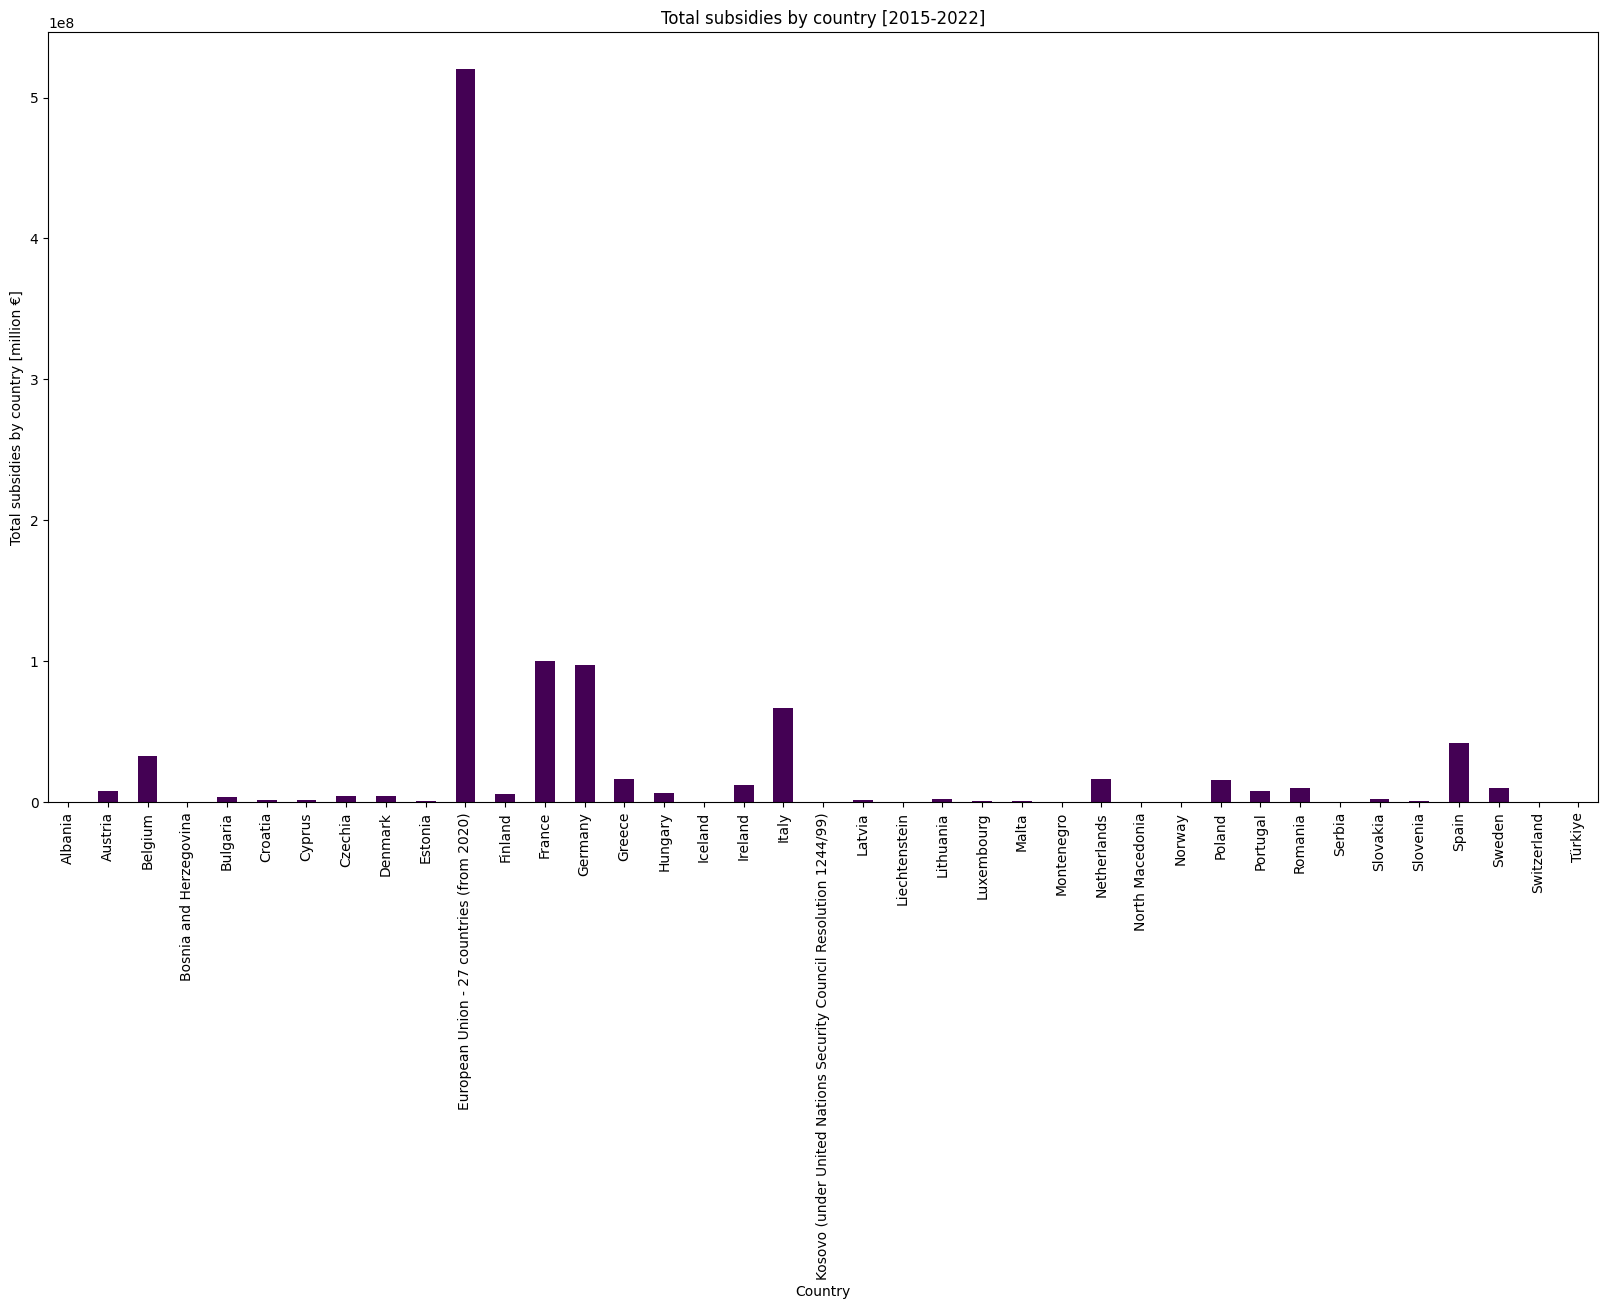

In [5]:
# Chart sum of obs_value by country
df.groupby("geo_label")["obs_value"].sum().plot(kind="bar", figsize=(20, 10), colormap="viridis")
plt.title("Total subsidies by country [2015-2022]")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.ylabel("Total subsidies by country [million €]")
export_plot_to_pdf(plt, "total_subsidies_by_country")
plt.show()


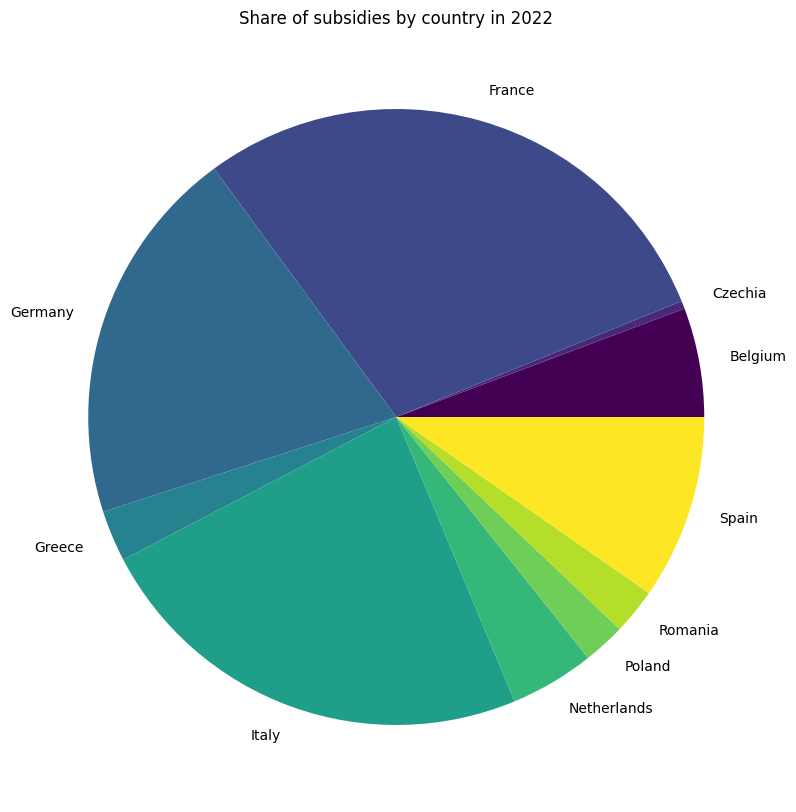

In [6]:
# Pie chart of share of subsidies by country in given year
year = 2022

# List of countries to plot
countries_pie = ["Germany", "France", "Italy", "Spain", "Poland", "Romania", "Netherlands", "Belgium", "Czechia", "Greece"]

df_pie = df[df["time"] == year]
df_pie = df_pie[df_pie["geo_label"].isin(countries_pie)]
df_pie.groupby("geo_label")["obs_value"].sum().plot(kind="pie", figsize=(20, 10), colormap="viridis")
plt.title(f"Share of subsidies by country in {year}")
plt.ylabel("")
export_plot_to_pdf(plt, "share_of_subsidies_by_country_in_2022")
plt.show()



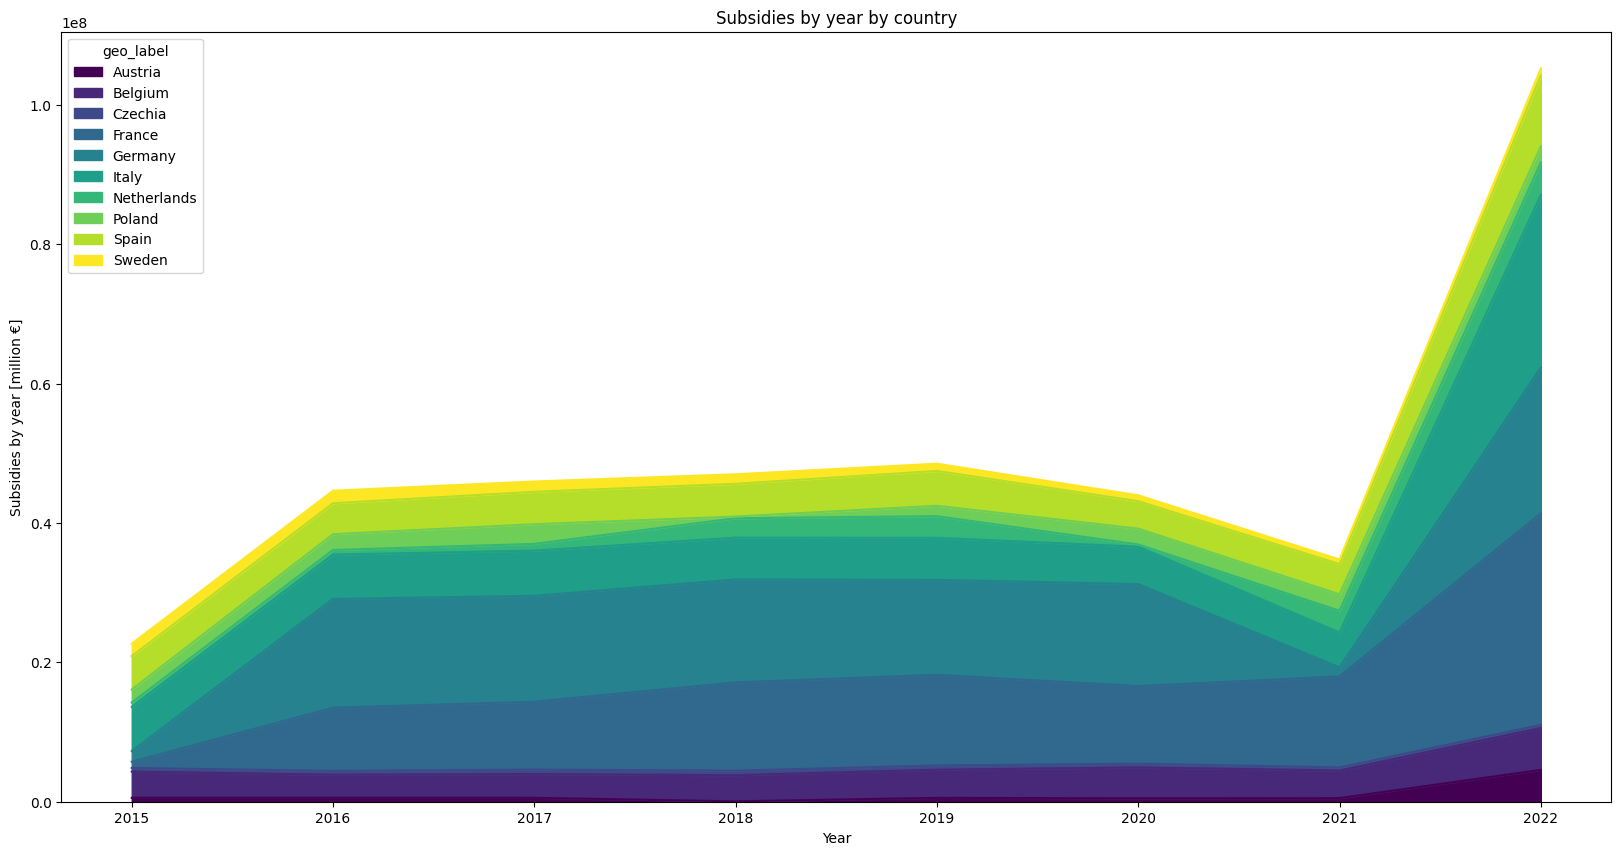

In [7]:
# List of countries to plot
countries_area = ["Germany", "France", "Italy", "Spain", "Netherlands", "Poland", "Sweden", "Czechia", "Belgium", "Austria"]

# Area chart of subsidies by year by country
df_area = df[df["geo_label"].isin(countries_area)]
df_area = df_area.groupby(["time", "geo_label"])["obs_value"].sum().unstack()
df_area.plot(kind="area", figsize=(20, 10), colormap="viridis")
plt.title("Subsidies by year by country")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.ylabel("Subsidies by year [million €]")
export_plot_to_pdf(plt, "subsidies_by_year_by_country")
plt.show()



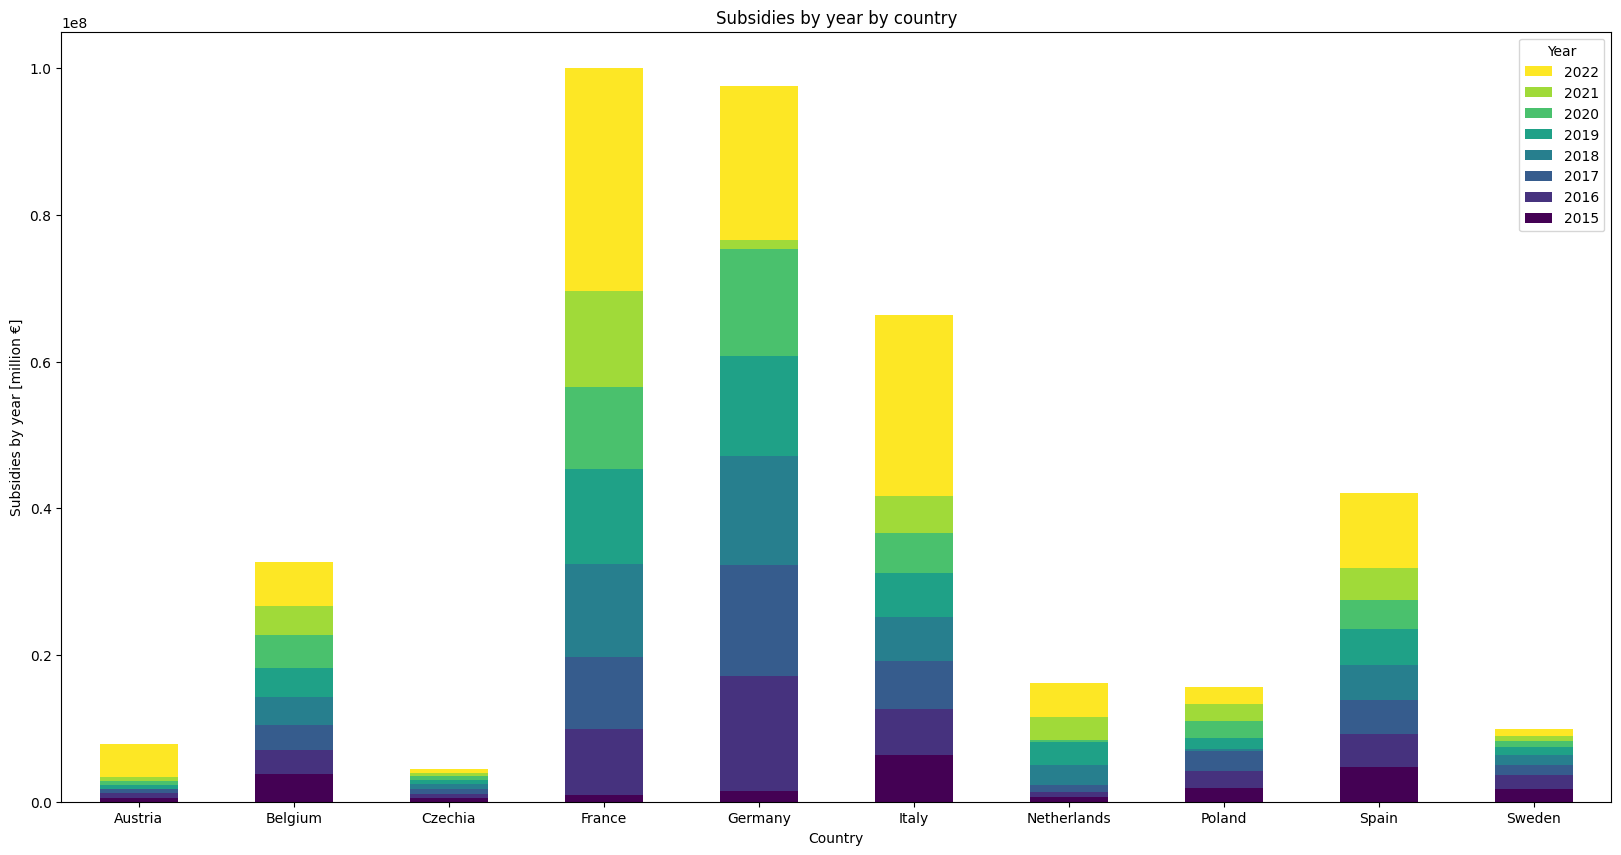

In [8]:
# List of countries to plot
countries_stacked = ["Germany", "France", "Italy", "Spain", "Netherlands", "Poland", "Sweden", "Czechia", "Belgium", "Austria"]

# Stacked bar chart of subsidies by country by year
df_stacked = df[df["geo_label"].isin(countries_stacked)]
df_stacked = df_stacked.groupby(["geo_label", "time"])["obs_value"].sum().unstack()
df_stacked.plot(kind="bar", stacked=True, figsize=(20, 10), colormap="viridis")
plt.title("Subsidies by year by country")
plt.xlabel("Country")
plt.xticks(rotation=0)
plt.ylabel("Subsidies by year [million €]")

# Sort legend entries by year
handles, labels = plt.gca().get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: int(t[0]), reverse=True))
plt.legend(handles, labels, title="Year")

export_plot_to_pdf(plt, "subsidies_by_country_by_year")
plt.show()


# Exercise 2 - Results

From the files used in the previous exercise, select the data (column) and save it in the file you created.

In [9]:
#code

# Report
The report from the exercises should contain the file SBDA_01a.ipynb with the code prepared during the exercises and a version of this file saved as html or pdf
please include name of downloaded files from 

### Data downloaded from: https://www.eea.europa.eu/en/datahub/datahubitem-view/9cde4c5f-3365-4715-b4ef-ce2a4efade62